# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.manifold  import TSNE

In [2]:
from sklearn import datasets
data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [3]:
model=KMeans(n_clusters=8)
model.fit(X)
score = metrics.silhouette_score(X,model.labels_,metric='euclidean',sample_size=len(X))
print('Silhouette Score =',score)

Silhouette Score = 0.5406824747857624


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [4]:
model=KMeans(n_clusters=5)
model.fit(X)
score = metrics.silhouette_score(X,model.labels_,metric='euclidean',sample_size=len(X))
print('Silhouette Score =',score)

Silhouette Score = 0.5489993239795691


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [5]:
model=KMeans(n_clusters=3)
model.fit(X)
score = metrics.silhouette_score(X,model.labels_,metric='euclidean',sample_size=len(X))
print('Silhouette Score =',score)

Silhouette Score = 0.5711381937868844


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

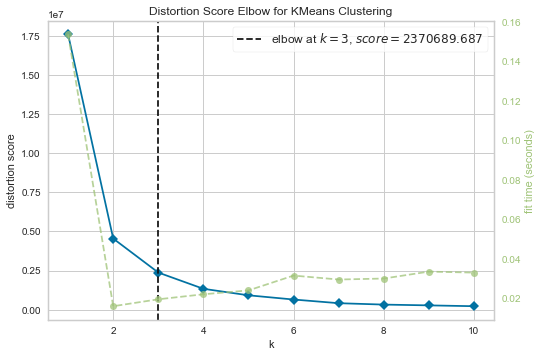

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
model = KMeans()
visualizer = KElbowVisualizer(model, 
                              k=(1,11),
                              metric='distortion')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

C:\Users\Emilio\anaconda3\envs\data\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Emilio\anaconda3\envs\data\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Emilio\anaconda3\envs\data\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


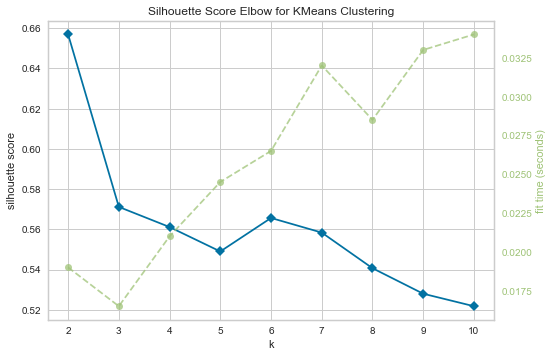

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [7]:
model = KMeans()
visualizer = KElbowVisualizer(model, 
                              k=(2,11),
                              metric='silhouette')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

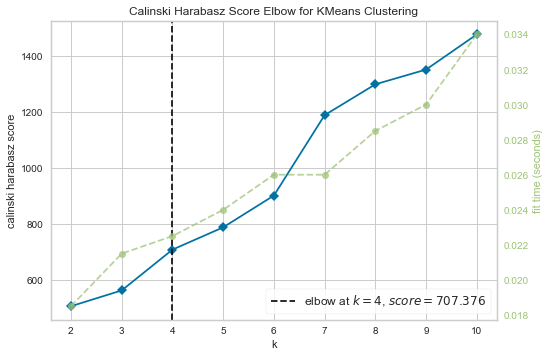

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [8]:
model = KMeans()
visualizer = KElbowVisualizer(model, 
                              k=(2,11),
                              metric='calinski_harabasz')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

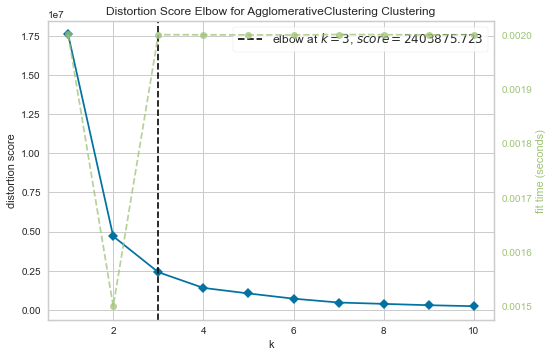

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, 
                              k=(1,11),
                              metric='distortion')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()  

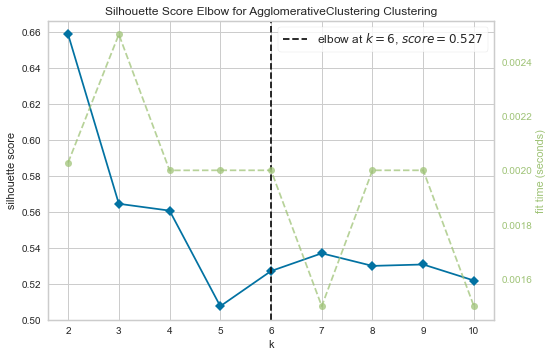

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [10]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, 
                              k=(2,11),
                              metric='silhouette')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

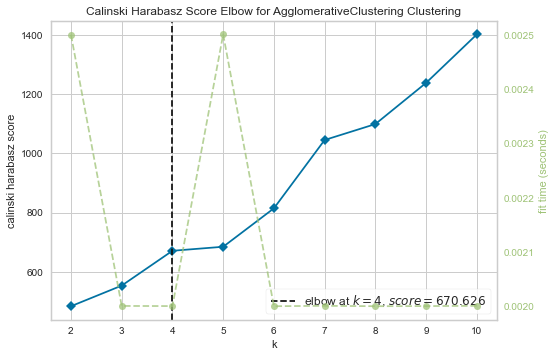

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [11]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, 
                              k=(2,11),
                              metric='calinski_harabasz')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [12]:
model = KMeans(n_clusters = 3).fit(X)
X['labels'] = model.labels_

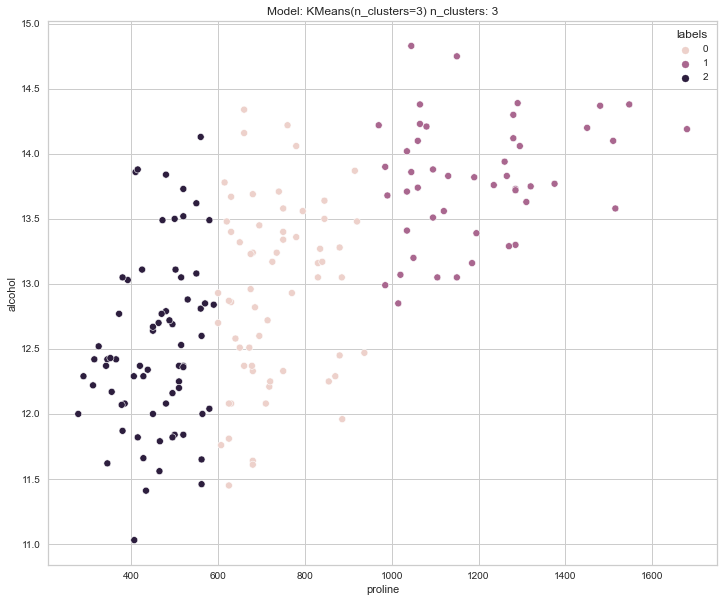

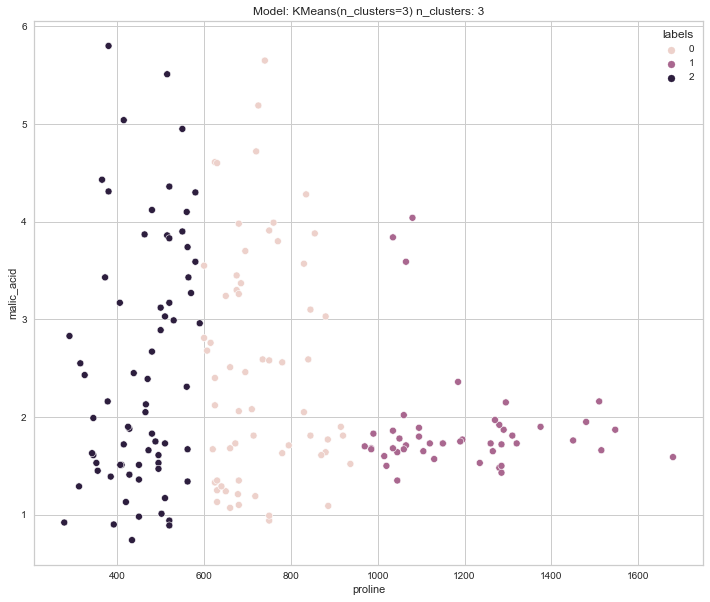

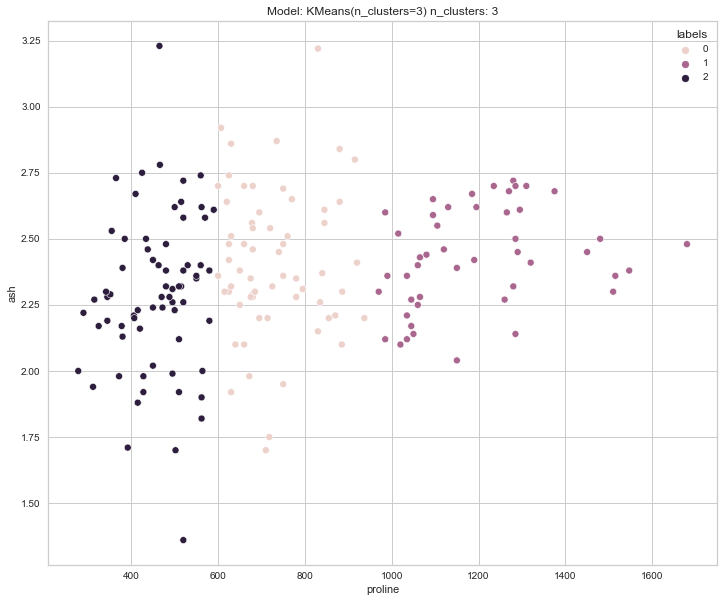

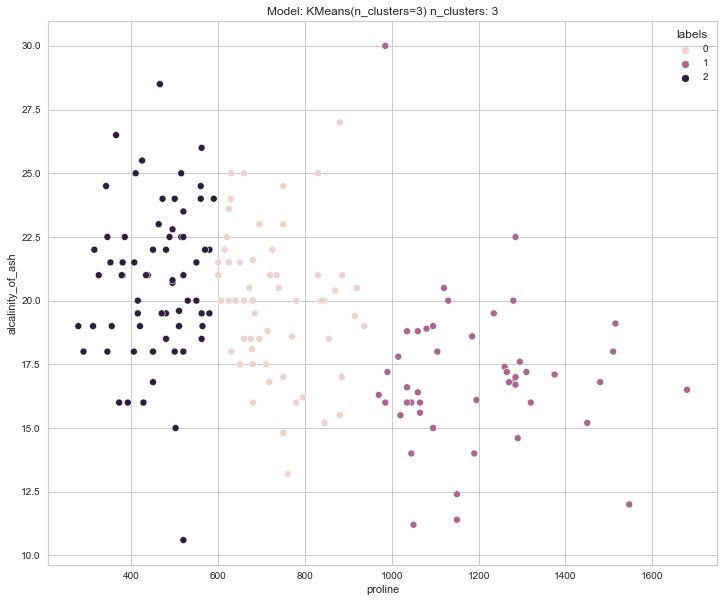

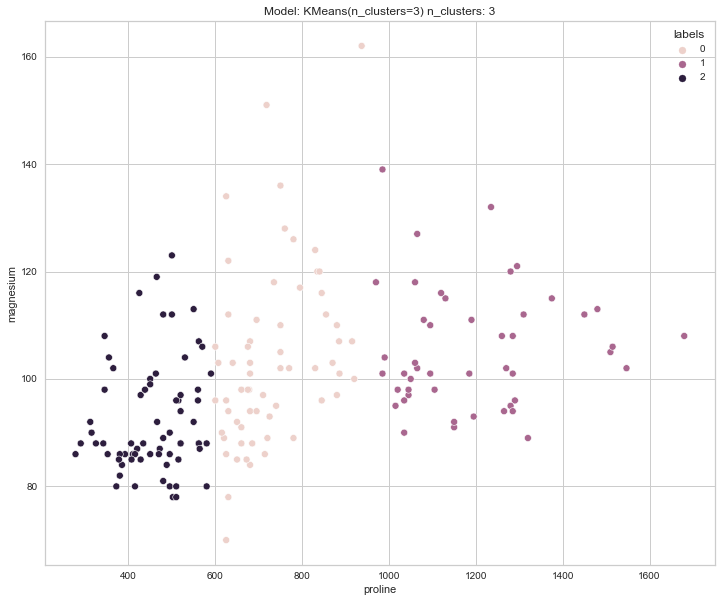

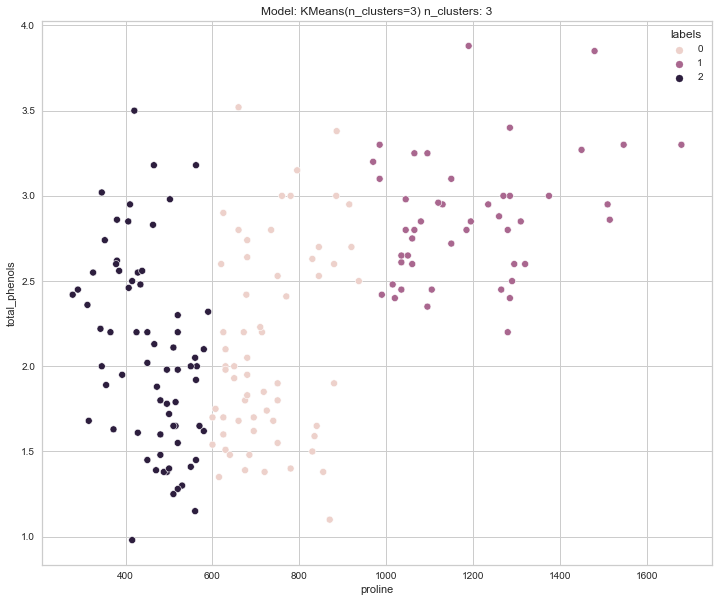

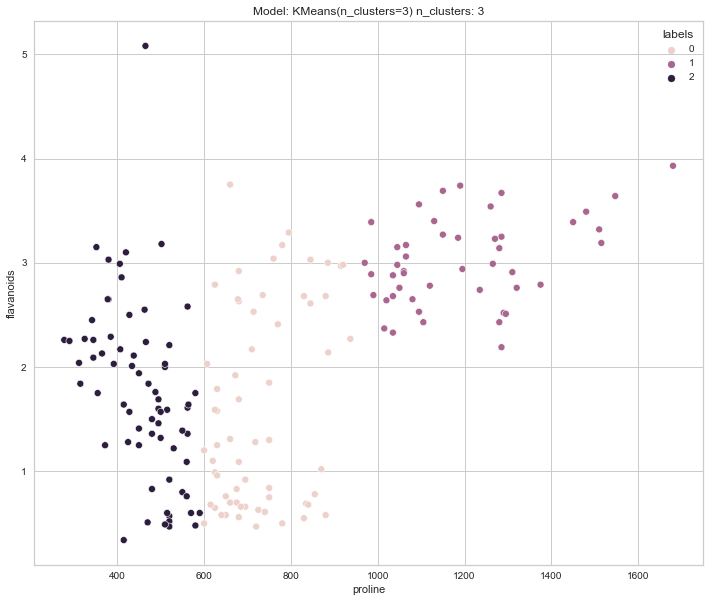

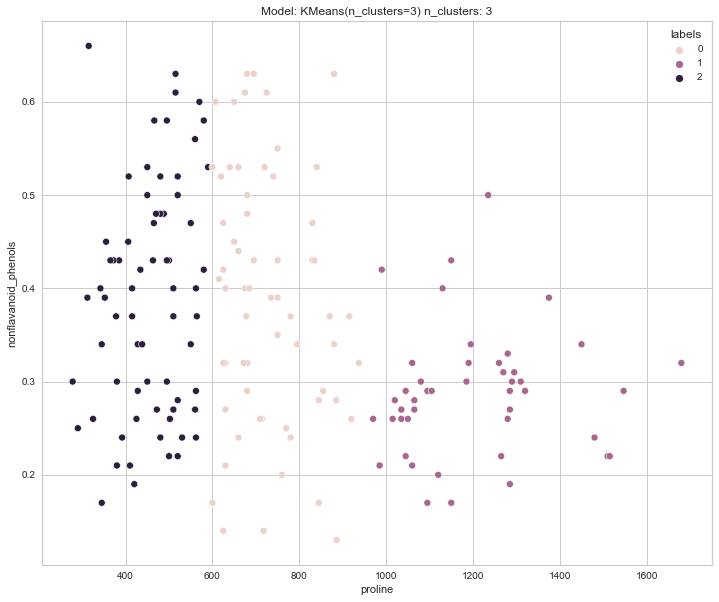

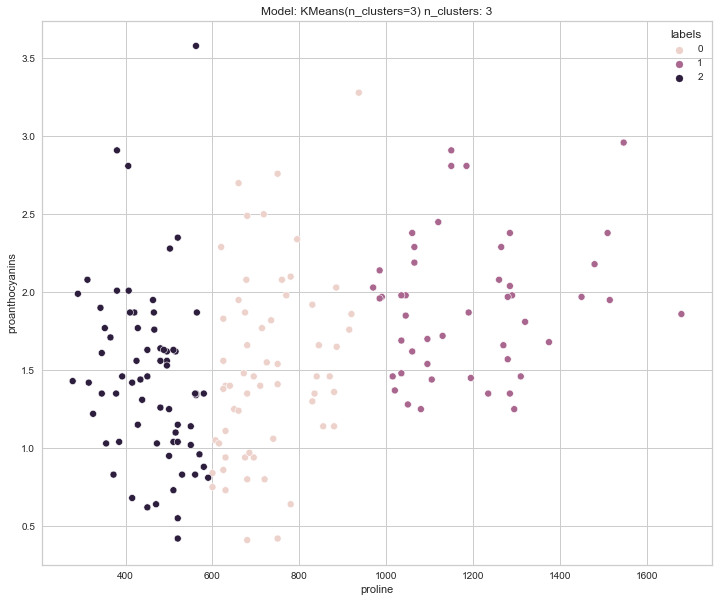

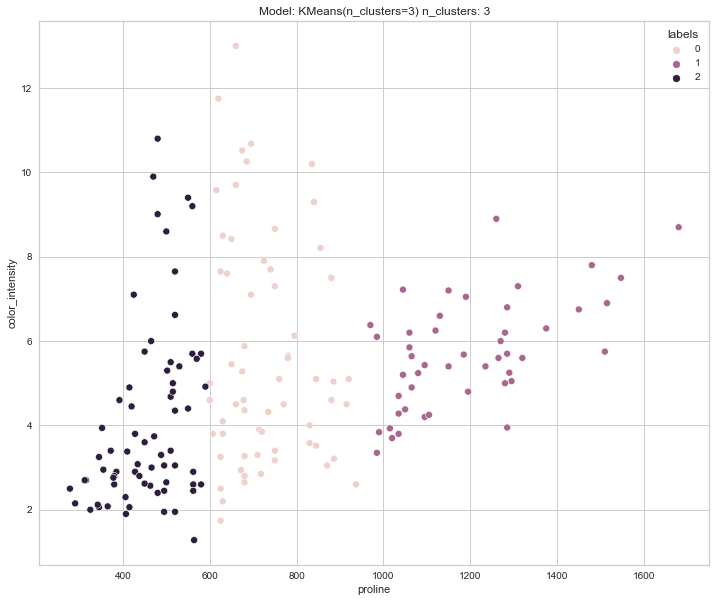

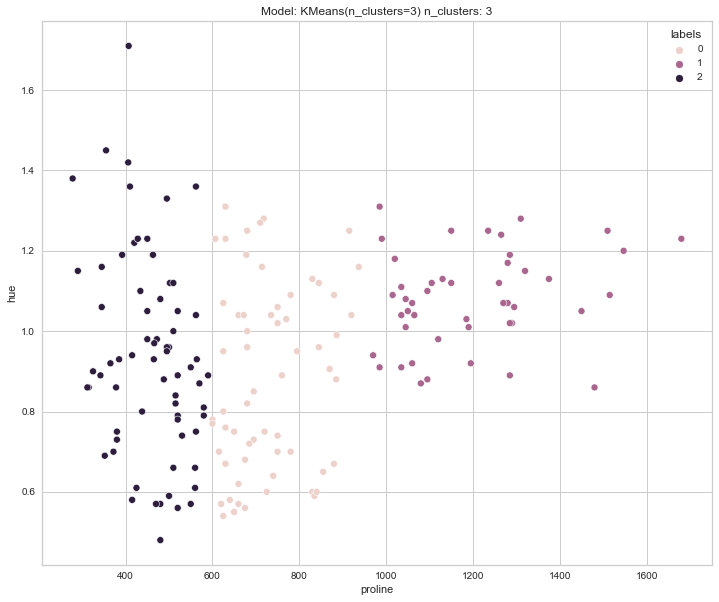

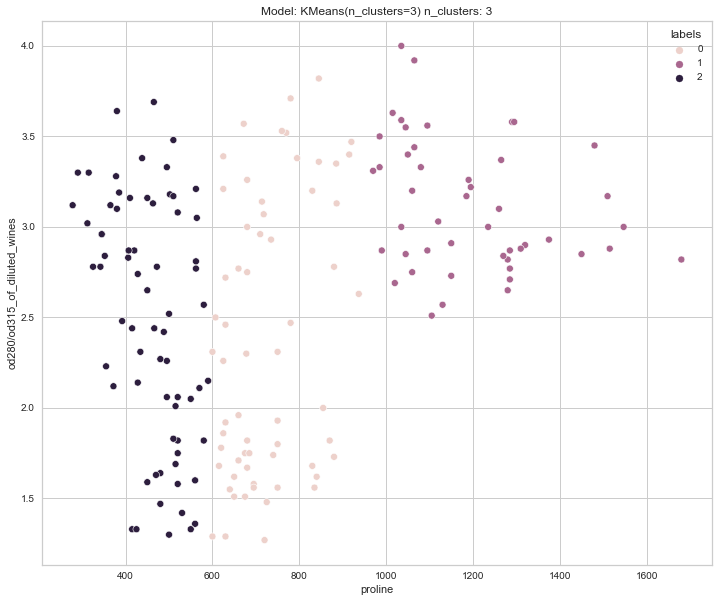

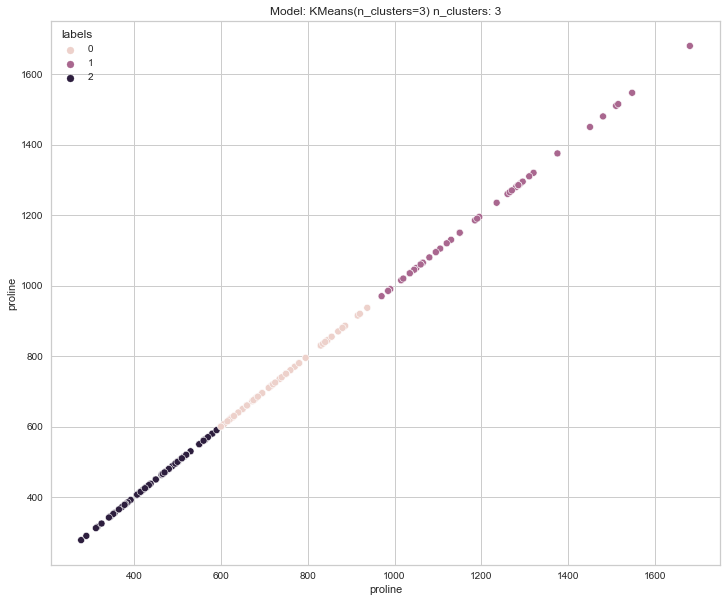

In [13]:
for y in X.columns.drop(['labels']):
    fig,a =  plt.subplots(figsize=(12,10))
    plt.title(f"Model: {str(model)} n_clusters: {3}")
    fig = sns.scatterplot(x = 'proline', 
                          y = y,
                          data = X,
                          hue = 'labels')

In [14]:
##Is by "proline" the classifications.

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

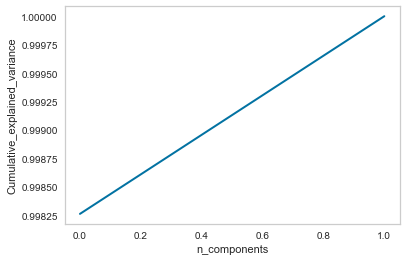

In [15]:
pca=PCA()
sample_data= X.drop('labels', axis = 1)
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
plt.figure(1, figsize=(6, 4))
plt.plot(cum_var_explained, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [17]:
df_pca= pd.DataFrame(data = pca_data , columns = ['principal_component_1', 'principal_component_2'])
df_pca_comp = pd.DataFrame(data=pca.components_,
                           columns = X.drop('labels',axis = 1).columns.values,
                           index = ['principal_component_1', 'principal_component_2']
                           )

df_pca_comp

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
principal_component_1,0.001659,-0.000681,0.000195,-0.004671,0.017868,0.000990,0.001567,-0.000123,0.000601,0.002327,0.000171,0.000705,0.999823
principal_component_2,0.001203,0.002155,0.004594,0.026450,0.999344,0.000878,-0.000052,-0.001354,0.005004,0.015100,-0.000763,-0.003495,-0.017774


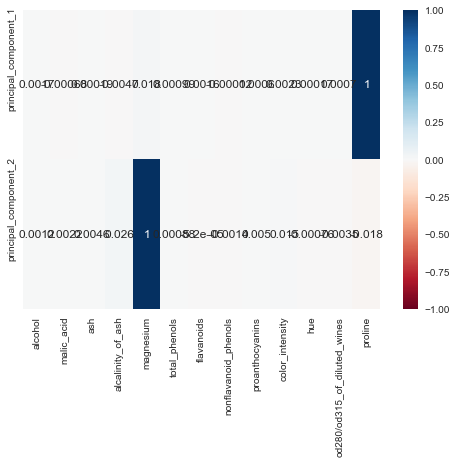

In [18]:
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap='RdBu',
            annot=True
            )
plt.yticks([0,1],
           ['principal_component_1', 'principal_component_2']
           );

In [19]:
df_pred = pd.concat([df_pca,X['labels']],axis=1)

In [20]:
df_pred

,principal_component_1,principal_component_2,labels
0,318.562979,21.492131,1
1,303.097420,-5.364718,1
2,438.061133,-6.537309,1
3,733.240139,0.192729,1
4,-11.571428,18.489995,0
...,...,...,...
173,-6.980211,-4.541137,0
174,3.131605,2.335191,0
175,88.458074,18.776285,0
176,93.456242,18.670819,0


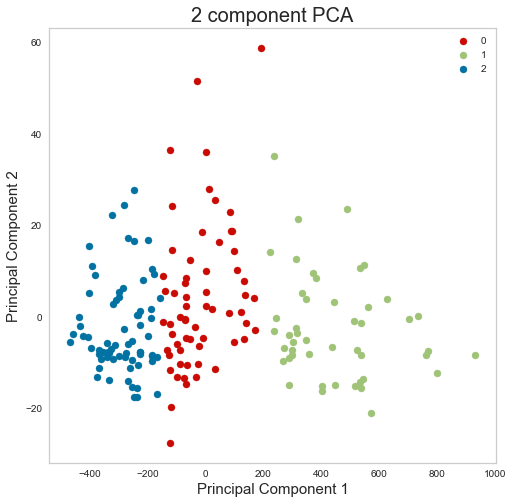

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = df_pred['labels'].sort_values().unique()
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indices_targets = df_pred['labels'] == target
    ax.scatter(df_pred.loc[indices_targets, 'principal_component_1']
               , df_pred.loc[indices_targets, 'principal_component_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
#Sere honesto no se usar PCA

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

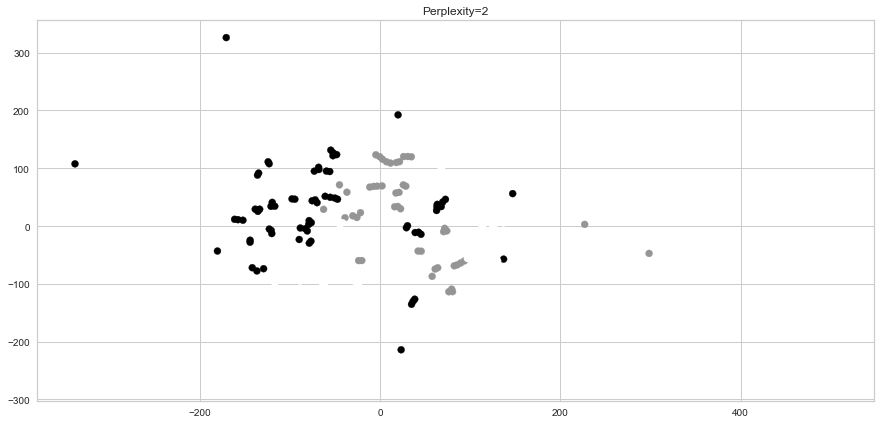

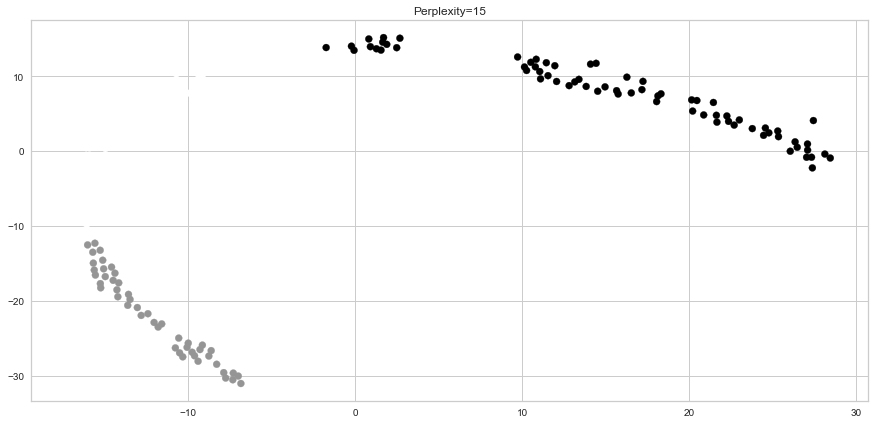

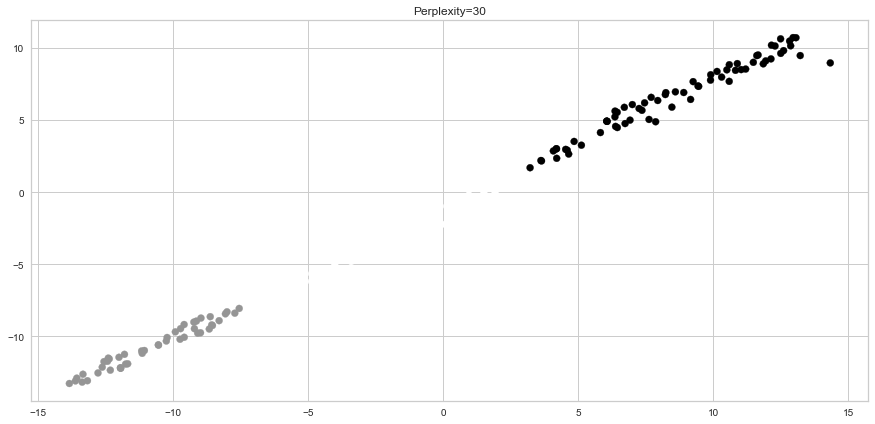

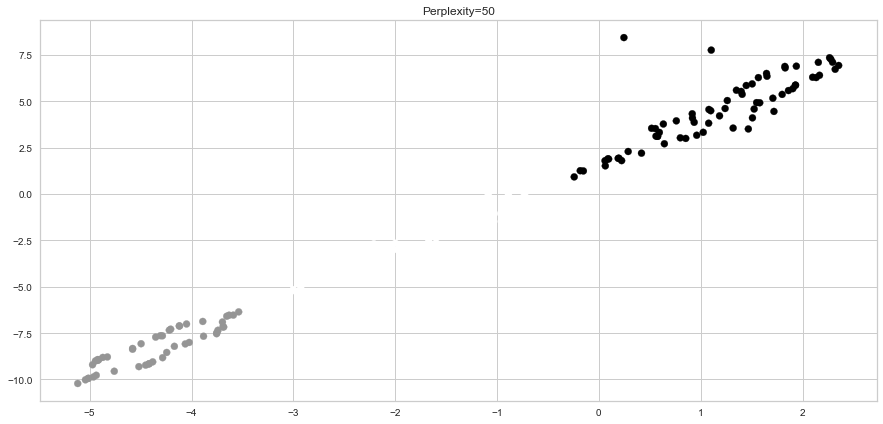

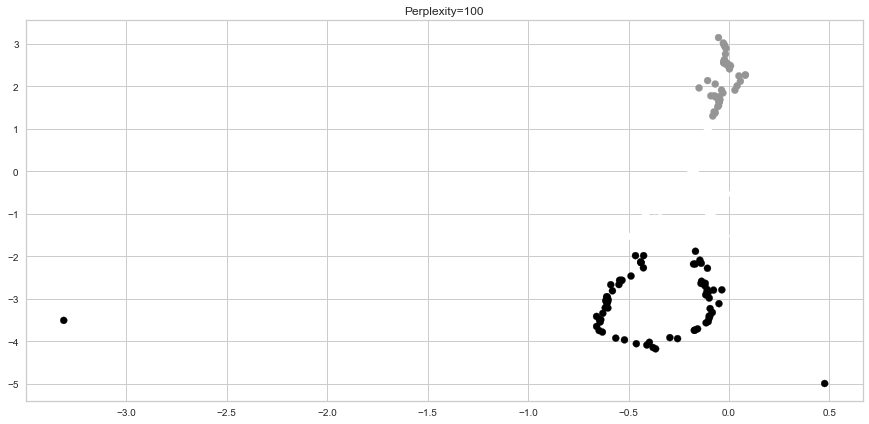

In [35]:
for perp in [2,15,30,50,100]:
    fig, ax = plt.subplots(figsize=(15,7))
    tsne=TSNE(perplexity=perp,random_state=0)
    x_unida=tsne.fit_transform(df_pred[['principal_component_1','principal_component_2']])
    ax.scatter(x_unida[:,0],x_unida[:,1],c=df_pred['labels'])
    ax.set_title(f'Perplexity={perp}')
    plt.show()
 
#Perplejidad determina que tan amplio o estrecho es un espacio en t-sne que captura la similitues de los grupos.
  #Si la perplejidad es baja (2), tsne solo usara dos puntos similares y mostrara un grafico dispoerto.
  #Por lo general, se establece entre 5 y 50 